<a href="https://colab.research.google.com/github/Shunsuke-Nakatani/HttpParamsDataset/blob/master/deepleraning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 新しいセクション

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# ライブラリのインポート(globライブラリを用いてファイル検索)
import glob

#フォルダの名前は？
folder_name = "5of1000MIX"

# ファイル一覧を取得
print(glob.glob('/content/drive/MyDrive/classification/content/*'))
images = glob.glob('/content/drive/MyDrive/classification/content/'+folder_name+'/*.jpg')  #trainフォルダに画像全部入れればよい

# ファイル名を確認(先頭3枚)
print(images[:3])

['/content/drive/MyDrive/classification/content/train', '/content/drive/MyDrive/classification/content/train50', '/content/drive/MyDrive/classification/content/train25', '/content/drive/MyDrive/classification/content/train75', '/content/drive/MyDrive/classification/content/1of1000MIX', '/content/drive/MyDrive/classification/content/3of1000MIX', '/content/drive/MyDrive/classification/content/5of1000MIX', '/content/drive/MyDrive/classification/content/10of1000MIX']
['/content/drive/MyDrive/classification/content/5of1000MIX/normal_case0.jpg', '/content/drive/MyDrive/classification/content/5of1000MIX/normal_case1.jpg', '/content/drive/MyDrive/classification/content/5of1000MIX/normal_case2.jpg']


filename:/content/drive/MyDrive/classification/content/5of1000MIX/normal_case0.jpg, size:(359, 434)


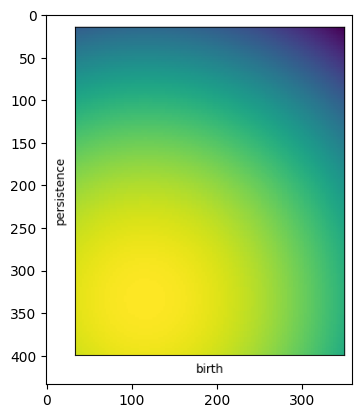

In [3]:
# 画像表示に必要なモジュールをインポート
import matplotlib.pyplot as plt
from PIL import Image
2
# 画像の表示
image_sample = images[0]
img = Image.open(image_sample)
print('filename:{}, size:{}'.format(image_sample, img.size))
plt.imshow(img)
plt.show()

一連の流れを実行するためにフォルダを作成．dogを正常ラベルとする

In [5]:
import os 
import shutil
#昔にあったフォルダを削除する
shutil.rmtree('/content/images/train/')
shutil.rmtree('/content/images/val/')
shutil.rmtree('/content/images/test/')

# train用フォルダ作成
os.makedirs('/content/images/train/dog', exist_ok=True)
os.makedirs('/content/images/train/cat', exist_ok=True)

# val用フォルダ作成
os.makedirs('/content/images/val/dog', exist_ok=True)
os.makedirs('/content/images/val/cat', exist_ok=True)

# test用フォルダ作成
os.makedirs('/content/images/test/dog', exist_ok=True)
os.makedirs('/content/images/test/cat', exist_ok=True)

In [6]:
# 犬・猫ごとのファイルパス一覧を取得
images_dog = glob.glob('/content/drive/MyDrive/classification/content/'+folder_name+'/normal'+'*.jpg')
images_cat = glob.glob('/content/drive/MyDrive/classification/content/'+folder_name+'/case'+'*jpg')
print(len(images_dog))
print(len(images_cat))

298
266


In [7]:
# ファイルを分割(train, val, test)
idx_test_start = int(len(images_cat) * 0.8)
idx_val_start = int(idx_test_start * 0.8)

images_train_dog = images_dog[:idx_val_start]
images_train_cat = images_cat[:idx_val_start]

images_val_dog = images_dog[idx_val_start:idx_test_start]
images_val_cat = images_cat[idx_val_start:idx_test_start]

images_test_dog = images_dog[idx_test_start:]
images_test_cat = images_cat[idx_test_start:]

In [8]:
import shutil

# 一括でファイルを移動する関数を作成
def move_files(file_list, target_dir):
    for file in file_list:
        shutil.move(file, target_dir)

# ファイル移動
move_files(images_train_dog, '/content/images/train/dog/')
move_files(images_train_cat, '/content/images/train/cat/')
move_files(images_val_dog, '/content/images/val/dog/')
move_files(images_val_cat, '/content/images/val/cat/')
move_files(images_test_dog, '/content/images/test/dog/')
move_files(images_test_cat, '/content/images/test/cat/')

In [9]:
#分類するクラス
classes = ['cat', 'dog']
nb_classes = len(classes)
 
# データのディレクトリ
train_data_dir = '/content/images/train'
validation_data_dir = '/content/images/val'
test_data_dir = '/content/images/test'

# 学習回数
epochs = 10

# バッチサイズ
batch_size = 16

# 画像サイズ
img_width, img_height = 224, 224

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 学習データのImageDataGenerator作成
train_datagen = ImageDataGenerator(rescale=1.0 / 255)  # rescaleで各画素のスケールを0～255から0～1に変換
train_generator = train_datagen.flow_from_directory(
    directory=train_data_dir,
    target_size=(img_width, img_height),
    color_mode='rgb',
    classes=classes,
    class_mode='categorical',
    batch_size=batch_size
)

Found 338 images belonging to 2 classes.


In [11]:
# 検証データのImageDataGenerator作成
validation_datagen = ImageDataGenerator(rescale=1.0 / 255) 
validation_generator = validation_datagen.flow_from_directory(
    directory=validation_data_dir,
    target_size=(img_width, img_height),
    color_mode='rgb',
    classes=classes,
    class_mode='categorical',
    batch_size=batch_size
)

Found 86 images belonging to 2 classes.


In [12]:
# 評価データのImageDataGenerator作成
test_datagen = ImageDataGenerator(rescale=1.0 / 255) 
test_generator = test_datagen.flow_from_directory(
    directory=test_data_dir,
    target_size=(img_width, img_height),
    color_mode='rgb',
    classes=classes,
    class_mode='categorical',
    shuffle=False  # シャッフルしない
)

Found 140 images belonging to 2 classes.


In [13]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Flatten, Dense

input_tensor = Input(shape=(img_width, img_height, 3))
VGG16 = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

In [14]:
# VGG16のパラメータを凍結(すべての層を凍結)
for layer in VGG16.layers:
    layer.trainable = False 

In [15]:
# 差し替え用の新しい層を追加
model = Sequential()
model.add(VGG16)
model.add(Flatten())
model.add(Dense(nb_classes, activation='softmax'))

In [16]:
print(folder_name)
model.summary()

5of1000MIX
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 2)                 50178     
                                                                 
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


In [17]:
from tensorflow.keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-3),
              metrics=['accuracy'])

In [18]:
# 学習
steps_per_epoch = int(len(train_generator.classes) / batch_size) 
history = model.fit(
    x=train_generator,  # 学習データ
    steps_per_epoch=steps_per_epoch,  # ステップ数
    epochs=epochs,  # エポック数
    validation_data=validation_generator  # 検証データ
)

Epoch 1/10
21/21 [==============================] - 10s 254ms/step - loss: 1.1045 - accuracy: 0.4845 - val_loss: 0.7065 - val_accuracy: 0.5000
Epoch 2/10
21/21 [==============================] - 2s 101ms/step - loss: 0.8370 - accuracy: 0.5248 - val_loss: 0.6987 - val_accuracy: 0.5000
Epoch 3/10
21/21 [==============================] - 2s 94ms/step - loss: 0.6394 - accuracy: 0.6242 - val_loss: 0.6523 - val_accuracy: 0.5814
Epoch 4/10
21/21 [==============================] - 2s 96ms/step - loss: 0.6014 - accuracy: 0.6801 - val_loss: 0.9343 - val_accuracy: 0.5000
Epoch 5/10
21/21 [==============================] - 2s 98ms/step - loss: 0.6775 - accuracy: 0.6149 - val_loss: 0.6622 - val_accuracy: 0.5000
Epoch 6/10
21/21 [==============================] - 2s 104ms/step - loss: 0.6311 - accuracy: 0.5652 - val_loss: 0.5893 - val_accuracy: 0.8023
Epoch 7/10
21/21 [==============================] - 3s 131ms/step - loss: 0.5206 - accuracy: 0.8043 - val_loss: 0.5750 - val_accuracy: 0.8372
Epoch 8/

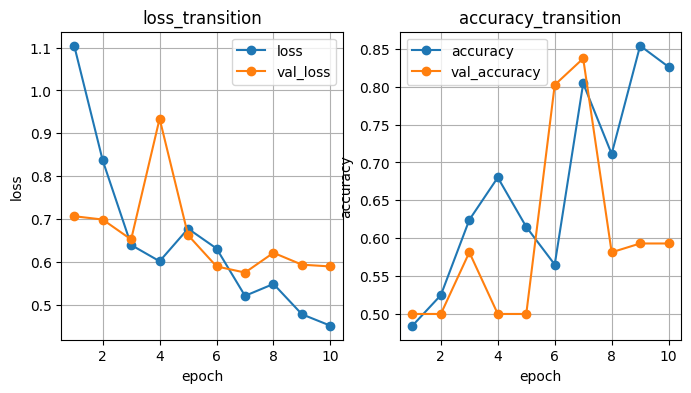

In [19]:
# グラフ描画(2画面)
plt.figure(figsize=(8, 4))

# epochごとのlossを表示
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), history.history['loss'], '-o')
plt.plot(range(1, epochs+1), history.history['val_loss'], '-o')
plt.title('loss_transition')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid()
plt.legend(['loss', 'val_loss'], loc='best')

# epochごとのaccuracyを表示
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), history.history['accuracy'], '-o')
plt.plot(range(1, epochs+1), history.history['val_accuracy'], '-o')
plt.title('accuracy_transition')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend(['accuracy', 'val_accuracy'], loc='best')

# グラフ表示
plt.show()

In [20]:
print(folder_name)
model.evaluate(test_generator)

5of1000MIX
5/5 [==============================] - 6s 580ms/step - loss: 0.6970 - accuracy: 0.5286


[0.6969777345657349, 0.5285714268684387]

In [21]:
# 正解のラベル一覧を作成。
true = test_generator.classes
true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [22]:
# 予測のラベル一覧を作成
import numpy as np
p = model.predict(test_generator)
pred = np.argmax(p, axis=1)
pred

5/5 [==============================] - 1s 120ms/step


array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1])

In [23]:
# 混同行列表示
from tensorflow.math import confusion_matrix
confusion_matrix(true, pred)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[12, 42],
       [24, 62]], dtype=int32)>

In [24]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print(folder_name)
print('precision:', precision_score(true, pred))
print('recall:', recall_score(true, pred))
print('f1_score:', f1_score(true, pred))

5of1000MIX
precision: 0.5961538461538461
recall: 0.7209302325581395
f1_score: 0.6526315789473683
